<a href="https://colab.research.google.com/github/mchrgr2000/hello-world/blob/master/MS_net_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feb 2021*

**Programma** Marcello, test teoria # 新しいセクション

In [16]:
from numpy import *
from scipy import signal
import matplotlib.pyplot as plt
import math

In [17]:
#@title デフォルトのタイトル テキスト
def dirac (x):
	eps=1e-6
	if x<=eps and x>=-eps:return 1
	#if x !=0: return 0
	else : return 0


In [18]:
def unNeu(tV):
    Tzero=1 # soglia in mV
    bt=0.08*Tzero # l'incremento dinamico di Theta zero
    Theta=Tzero + bt # theta iniziale
    spk=zeros((0)) # vettore degli spike
    ths=zeros((0)) # vettore soglia 
    kt=0;ThetaSpike=Theta
    for tt in tV:
        r=random.random() # numero tra zero e uno
        if r<p:
            kt=0; 
            spk=append(spk,1);
            Theta=Theta+bt
            ThetaSpike=Theta
            ths=append(ths,Theta)
        else:
            kt=kt+1
            spk=append(spk,0);
            Theta = Theta - bt*math.exp(-kt*tau); #
            if Theta<=Tzero: Theta=Tzero # non va sotto la soglia
            ths=append(ths,Theta)
    #print t

    f=sum(spk) # numero di spike nell'intervallo (Tmax-Tmin)
    #print("numero di spikes nell'intervallo %5.2g e' %d"%((Tmax-Tmin),int(f)))
    return spk, ths

In [19]:
def mNeu(tV,NN,tau):
    print("Numero neuroni: %g"%NN)
    # tV vettore del tempo
    # NN numero Neuroni
    # tau costante decadimento
    Tzero=1 # soglia iniziale in mV
    bt=0.08*Tzero # l'incremento dinamico di Theta zero
    Theta=Tzero + bt # theta iniziale
    nV=arange(NN) # the neuron vector index
    spk=zeros((0)) # matrice degli spike
    ths=zeros((0)) # matrice delle soglie 
    thsFn=zeros((0)) # matrice delle ultime theta su tutto il periodo
    kt=0;# contatore "no spike"
    for nn in nV: # loop nei neuroni
        ###### loop sul tempo ############
        for tt in tV: # loop nel tempo
            r=random.random() # numero tra zero e uno
            if r<p: # spara
                kt=0; 
                spk=append(spk,1); # 1 se spara
                Theta=Theta+bt # aumenta soglia
                #ThetaSpike=Theta
            else: # non spara
                kt=kt+1
                spk=append(spk,0); # zero se non spara
                Theta = Theta - bt*math.exp(-kt/tau); # decresce soglia
                if Theta<=Tzero: Theta=Tzero # non va sotto la soglia minima
            ths=append(ths,Theta) 
        ### finito loop sul tempo
        thsFn=append(thsFn,Theta) # mette in memoria l'ultima theta
    avTheta=average(thsFn) # fa la media delle ultime thresholds fra tutti i neuroni
    #print(shape(spk),shape(ths))
    #### converte i vettori lunghi len(tV) in matrici 
    #### di dimensioni len(tV) x len(nV) 
    #### dove len(tV) e' la lunghezza del vettore tempo tV, etc etc
    spk=spk.reshape( (len(nV),len(tV)) ) # diventa un array
    ths=ths.reshape( (len(nV),len(tV)) ) # diventa un array
    print("shape spk and ths: ",shape(spk),shape(ths))	
    return spk, ths, avTheta

In [20]:
def grafici():
  ######################## GRAFICI ###################
  import matplotlib.pyplot as plt
  plt.subplot(2,1,1)
  plt.title("spikes")
  plt.imshow(spikes)
  plt.xlabel("tempo")
  plt.ylabel("neuroni")
  plt.colorbar() # disegna la barra colori
  plt.subplot(2,1,2)
  plt.title("dinamica della soglia")
  plt.imshow(theta)
  plt.xlabel("tempo")
  plt.ylabel("valore soglia")
  plt.colorbar() # disegna la barra colori
  plt.show() 

In [21]:
#### MAIN PROGRAM #############

Tmax=100. # 10 secondi
Tmin=0.
N=200. # numero di punti
Nn=100 # numero neuroni
dt=(Tmax-Tmin)/N # intervallo temporale
tau=50*dt # costante di decadimento della soglia dinamica
t=arange(Tmin,Tmax,dt) # vettore temporale
p=0.15 # probabilita' di spike per unita' di intervallo temporali

spikes,theta,thAv=mNeu(t,Nn,tau)
#plt.plot(thAv);plt.ylim([0.90,2]);plt.show() # show the graph of the averages
print("media delle thresholds di %g neuroni e' %g"%(Nn,thAv))

Numero neuroni: 100
shape spk and ths:  (100, 200) (100, 200)
media delle thresholds di 100 neuroni e' 1.01057


shape theta (100, 200)


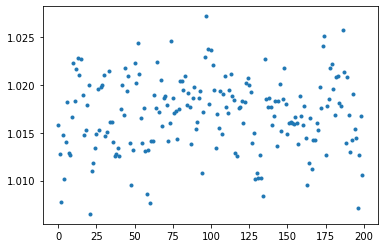

In [22]:
print("shape theta",shape(theta))
thsAv=average(theta,axis=0)
plt.plot(thsAv,'.')
#plt.xlim([400,410])
#plt.ylim([570,575])

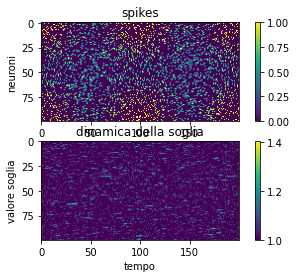

In [23]:
grafici()

In [24]:
def At(spk,dt):
    "calcola la popolazione attiva partendo dalla simulazione"
    # SPK sono gli spikes simulati
    # dt l'intervallo temporale
    print(shape(spk))
    N=shape(spk)[0]
    ns=sum(spk,axis=0) # vettore numero di spikes
    nsn=sum(spk,axis=0)/N # vettore probabilita di spike
    At=(sum(spk,axis=0)/N)/dt # vettore popolazione attiva
    return ns,nsn,At

In [25]:
At(spikes,dt)

(100, 200)


(array([17., 12.,  7., 17., 10., 14., 18., 11., 12., 17., 21., 13., 19.,
        20., 15., 17., 15., 13., 15., 18., 18.,  3., 12., 12., 15., 14.,
        17., 12., 16., 14., 16., 10., 12., 20., 14., 14., 13., 13., 13.,
        13., 12., 20., 19., 13., 20., 15., 17., 10.,  7., 13., 21., 14.,
        21., 17., 13., 13., 18., 12.,  8., 13.,  5., 14., 13., 18., 12.,
        15., 10., 17., 11., 15., 16., 14., 12., 16., 21., 12., 12., 13.,
        12., 16., 17., 19., 18., 17., 15., 17., 15., 12., 18., 18., 11.,
        13., 17., 20., 10., 16., 19., 20., 15., 11., 21., 17., 15., 11.,
        16., 12., 18., 13., 17., 18., 13., 14., 18., 18., 15., 16., 10.,
        11., 17., 15., 16., 13., 16., 17., 15., 12., 13., 11., 14.,  8.,
        10., 10., 14., 11.,  8., 23., 15., 16., 19., 17., 14., 15., 17.,
        12., 17., 17., 13., 19., 18., 15., 16., 16., 15., 15., 15., 13.,
        14., 13., 18., 14., 13., 17., 13.,  9., 13., 16.,  9., 14., 13.,
        16., 14., 16., 12., 19., 19.,  7., 16., 14.

In [26]:
ns=At(spikes,dt)[0]

(100, 200)


In [27]:
def buildMT(sN):
    "builds Marcov Transition Matrix"
    # sN is the values vector (must be integers!)
    mx=int(max(sN)) # the maximum value for sN
    print("mx",mx)
    MT=zeros((mx+1,mx+1)) # the Transition Matrix
    oval=0 # the first state value
    for i in range(len(sN)): # loop the sN
        val=int(sN[i]) # the state value
        #print("oval, val:",oval,val)
        MT[oval,val]=MT[oval,val]+1 # increment the MT
        oval=val # memorize the value in "oldvalue" oval
    return MT # 


mx 23


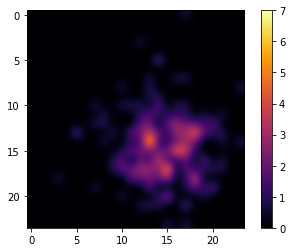

In [28]:
mt=buildMT(ns)
plt.imshow(mt,cmap=plt.cm.inferno,interpolation='bicubic')
plt.colorbar()


In [29]:
def Markov(tM,eN):
    "genera degli stati a partire da una matrice di transizione tM"
    # tM e' la matrice di transizione
    # eN e' il numero di eventi (quanti stati)
    nstati=shape(tM)[0]
    if shape(tM)[0]!= shape(tM)[1]: print ("matrice NON quadrata ! EXIT");return
    from sklearn.preprocessing import normalize # prende il comando normalize
    tMn=normalize(tM,axis=1,norm='l1') # normalizza le righe a somma 1
    stato=0 # lo stato iniziale
    ek=0
    while ek<eN:
        print("evento numero %d, stato %d"%(ek,stato))
        pdist=tMn[stato,:] # la distribuzione di probabilita per questo stato
        x=random.random() # extract a number 0-1
        #print("caso x=%g"%x)
        intp=0 # l'integrale della distribuzione
        for sk, p in enumerate(pdist):
            #print("contatore stati=%d"%sk)
            intp=intp+p # integra la probabilita'
            if x<intp: # si ferma quando l'integrale e' grande abbastanza
                #print("stato %d"%sk);
                stato=sk # sceglie il prossimo stato
                break # esce dal loop "for sk"
        ek=ek+1 # counter



In [30]:
Markov(mt,100)

evento numero 0, stato 0
evento numero 1, stato 17
evento numero 2, stato 17
evento numero 3, stato 15
evento numero 4, stato 16
evento numero 5, stato 14
evento numero 6, stato 13
evento numero 7, stato 17
evento numero 8, stato 9
evento numero 9, stato 14
evento numero 10, stato 12
evento numero 11, stato 12
evento numero 12, stato 18
evento numero 13, stato 3
evento numero 14, stato 12
evento numero 15, stato 16
evento numero 16, stato 15
evento numero 17, stato 17
evento numero 18, stato 11
evento numero 19, stato 13
evento numero 20, stato 19
evento numero 21, stato 18
evento numero 22, stato 12
evento numero 23, stato 13
evento numero 24, stato 16
evento numero 25, stato 15
evento numero 26, stato 17
evento numero 27, stato 15
evento numero 28, stato 11
evento numero 29, stato 13
evento numero 30, stato 12
evento numero 31, stato 15
evento numero 32, stato 16
evento numero 33, stato 16
evento numero 34, stato 15
evento numero 35, stato 18
evento numero 36, stato 18
evento numero 